# Kaggle API

In [1]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/be/57/a576a1f2f50f5c3bebd0c08fc3b2a6881dfde31c8217014978
Successfully built kaggle


Saving kaggle.json to kaggle.json


# Downloading Dataset

In [2]:
import os
! mkdir .kaggle
! mv kaggle.json .kaggle/
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge --force
! cp ".kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz" .
! tar -xzf fer2013.tar.gz
os.listdir()

example_submission.csv: Downloaded 7KB of 7KB
fer2013.tar.gz: Downloaded 92MB of 92MB


['datalab',
 '.rnd',
 '.ipython',
 '.local',
 '.forever',
 'fer2013.tar.gz',
 '.kaggle',
 '.config',
 '.cache',
 'fer2013']

# Data Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('fer2013/fer2013.csv')
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [0]:
y = dataset.iloc[:,0:1].values

X = np.zeros(shape=(dataset.shape[0],48,48))

for i in range(dataset.shape[0]):
    a = dataset['pixels'][i].split(' ')
    b = [int(x) for x in a]
    c = np.asarray(b,dtype = 'float32')
    d = c.reshape(48,48)
    X[i] = d
    
X = X.astype('float32')
X = X/255

classes = 7

In [0]:
index1 = 28709 # Cross-Validation SET ( Public Test )
index2 = 32298 # Final Test SET ( Private Test )

X_train = X[0:index1,:]
X_validate = X[index1:index2,:]
X_test = X[index2:,:]
y_train = y[0:index1,:]
y_validate = y[index1:index2,:]
y_test = y[index2:,:]

In [7]:
print(X_train.shape)
print(y_train.shape)

(28709, 48, 48)
(28709, 1)


In [8]:
X

array([[[0.27450982, 0.3137255 , 0.32156864, ..., 0.20392157,
         0.16862746, 0.16078432],
        [0.25490198, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862746, 0.21176471, ..., 0.19215687,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490198, 0.16470589, ..., 0.28235295,
         0.21960784, 0.16862746],
        [0.3019608 , 0.32156864, 0.30980393, ..., 0.4117647 ,
         0.27450982, 0.18039216],
        [0.3019608 , 0.28235295, 0.32941177, ..., 0.41568628,
         0.42745098, 0.32156864]],

       [[0.5921569 , 0.5882353 , 0.5764706 , ..., 0.5058824 ,
         0.54901963, 0.47058824],
        [0.5921569 , 0.58431375, 0.58431375, ..., 0.47843137,
         0.5529412 , 0.5372549 ],
        [0.5921569 , 0.5921569 , 0.6117647 , ..., 0.42745098,
         0.48235294, 0.57254905],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.7294118 ],
        [0.7

# Neural Network

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Data Reshaping
y_train = np_utils.to_categorical(y_train,classes)
y_validate = np_utils.to_categorical(y_validate,classes)
y_test = np_utils.to_categorical(y_test,classes)
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_validate = X_validate.reshape(X_validate.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)


(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)
(3589, 48, 48, 1)
(3589, 7)


In [0]:
model = Sequential()

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [0]:
# =============================================================================
# Section 1
# =============================================================================
model.add(Convolution2D(128,(4,4),input_shape=(48,48,1),strides = 2))


# =============================================================================
# Section 2
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 2))

# =============================================================================
# Section 3
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 128)       2176      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       262272    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
Total params: 526,720
Trainable params: 526,720
Non-trainable params: 0
_________________________________________________________________


In [0]:

# =============================================================================
# Section 8
# =============================================================================
model.add(Dense(512))
model.add(Activation('relu'))

# =============================================================================
# Section 9
# =============================================================================
model.add(Dense(128))
model.add(Activation('relu'))

# =============================================================================
# Section 10
# =============================================================================
model.add(Dense(classes, activation='softmax'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 128)       2176      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       262272    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
__________

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, batch, logs={}):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [0]:
class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history1 = LossHistory()
history2 = AccHistory()

In [0]:
from keras.callbacks import ModelCheckpoint
filepath1="weights.best.acc.hdf5"
filepath2="weights.best.loss.hdf5"
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint1,checkpoint2,history1,history2]


In [49]:
model.fit(X_train, y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data = (X_validate,y_validate),callbacks=callbacks_list)

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 9s 313us/step - loss: 1.7186 - acc: 0.3059 - val_loss: 1.5998 - val_acc: 0.3781

Epoch 00001: val_acc improved from -inf to 0.37810, saving model to weights.best.acc.hdf5

Epoch 00001: val_loss improved from inf to 1.59983, saving model to weights.best.loss.hdf5
Epoch 2/10
28709/28709 [==============================] - 8s 293us/step - loss: 1.5177 - acc: 0.4094 - val_loss: 1.4875 - val_acc: 0.4244

Epoch 00002: val_acc improved from 0.37810 to 0.42435, saving model to weights.best.acc.hdf5

Epoch 00002: val_loss improved from 1.59983 to 1.48752, saving model to weights.best.loss.hdf5
Epoch 3/10
 9600/28709 [=========>....................] - ETA: 5s - loss: 1.4019 - acc: 0.4689

28709/28709 [==============================] - 8s 292us/step - loss: 1.4059 - acc: 0.4611 - val_loss: 1.4602 - val_acc: 0.4358

Epoch 00003: val_acc improved from 0.42435 to 0.43578, saving model to weights.best.acc.hdf5

Epoch 00003: val_loss improved from 1.48752 to 1.46015, saving model to weights.best.loss.hdf5
Epoch 4/10
28709/28709 [==============================] - 8s 294us/step - loss: 1.2902 - acc: 0.5059 - val_loss: 1.4554 - val_acc: 0.4561

Epoch 00004: val_acc improved from 0.43578 to 0.45612, saving model to weights.best.acc.hdf5

Epoch 00004: val_loss improved from 1.46015 to 1.45542, saving model to weights.best.loss.hdf5
Epoch 5/10
16000/28709 [===============>..............] - ETA: 3s - loss: 1.1388 - acc: 0.5699

28709/28709 [==============================] - 9s 296us/step - loss: 1.1570 - acc: 0.5629 - val_loss: 1.4603 - val_acc: 0.4478

Epoch 00005: val_acc did not improve from 0.45612

Epoch 00005: val_loss did not improve from 1.45542
Epoch 6/10
28709/28709 [==============================] - 8s 295us/step - loss: 0.9893 - acc: 0.6318 - val_loss: 1.5872 - val_acc: 0.4500

Epoch 00006: val_acc did not improve from 0.45612

Epoch 00006: val_loss did not improve from 1.45542
Epoch 7/10
26496/28709 [==========================>...] - ETA: 0s - loss: 0.8156 - acc: 0.6994

28709/28709 [==============================] - 8s 294us/step - loss: 0.8218 - acc: 0.6980 - val_loss: 1.7014 - val_acc: 0.4344

Epoch 00007: val_acc did not improve from 0.45612

Epoch 00007: val_loss did not improve from 1.45542
Epoch 8/10
28709/28709 [==============================] - 8s 295us/step - loss: 0.6380 - acc: 0.7691 - val_loss: 1.8916 - val_acc: 0.4466

Epoch 00008: val_acc did not improve from 0.45612

Epoch 00008: val_loss did not improve from 1.45542
Epoch 9/10
28032/28709 [============================>.] - ETA: 0s - loss: 0.4902 - acc: 0.8236

28709/28709 [==============================] - 8s 295us/step - loss: 0.4907 - acc: 0.8232 - val_loss: 2.1141 - val_acc: 0.4634

Epoch 00009: val_acc improved from 0.45612 to 0.46336, saving model to weights.best.acc.hdf5

Epoch 00009: val_loss did not improve from 1.45542
Epoch 10/10
28709/28709 [==============================] - 8s 295us/step - loss: 0.3806 - acc: 0.8669 - val_loss: 2.3906 - val_acc: 0.4500

Epoch 00010: val_acc did not improve from 0.46336

Epoch 00010: val_loss did not improve from 1.45542


In [50]:
test_score = model.evaluate(X_test, y_test, verbose=1)



3589/3589 [==============================] - 1s 197us/step


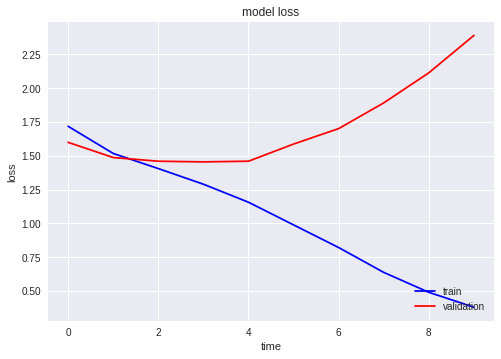

In [56]:
plt.plot(history1.train_losses,color = 'blue')
plt.plot(history1.val_losses,color = 'red')
#plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [52]:
print(history1.train_losses)
print(history1.val_losses)

[1.7186437924664206, 1.5176607695960913, 1.4058700981066723, 1.2902210037546091, 1.1569864915669528, 0.9893047897588738, 0.8218431561679741, 0.6380198730637301, 0.49074472960079096, 0.38062344709738716]
[1.599832432786214, 1.4875231807894214, 1.4601506527568278, 1.4554226489477617, 1.4603142976827295, 1.5872179713877639, 1.7014166704291054, 1.8916331905281023, 2.114092846905232, 2.3906222720370716]


In [53]:
print(history2.train_acc)
print(history2.val_acc)

[0.3059319377188407, 0.40941864919993, 0.4611097565181926, 0.5058692395801292, 0.5628548538412037, 0.6317879410264069, 0.6979692779309349, 0.7690619666078354, 0.823226166002354, 0.8669406805937349]
[0.3780997492420736, 0.42435218724293705, 0.4357759821718866, 0.45611590973246097, 0.44775703541911654, 0.44998606855107337, 0.434382836448844, 0.44664251881161915, 0.4633602674881307, 0.44998606854692147]


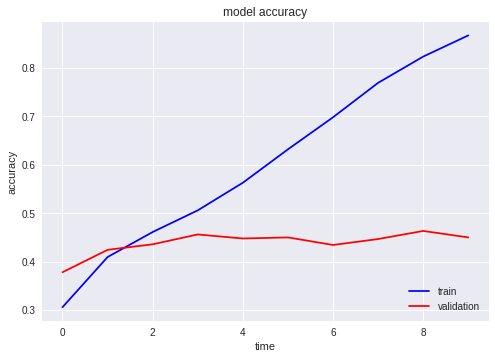

In [55]:
plt.plot(history2.train_acc,color = 'blue')
plt.plot(history2.val_acc,color = 'red')
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('time')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [58]:
print(X_validate.shape)
print(y_validate.shape)


(3589, 48, 48, 1)
(3589, 7)


In [57]:
validation_score = model.evaluate(X_validate, y_validate, verbose=1)

3589/3589 [==============================] - 1s 184us/step


In [21]:
print(' Validation SET Accuracy = '+ str(validation_score[1]))
print(' Test SET Accuracy = '+ str(test_score[1]))

 Validation SET Accuracy = 0.46252438008336844
 Test SET Accuracy = 0.45528002229863535


# Visualization

In [60]:
config = model.get_config()
print(config)

[{'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'filters': 128, 'kernel_size': (4, 4), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_5', 'trainable': True, 'filters': 128, 'kernel_size': (4, 4), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_a

In [59]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Selecting previously unselected package fontconfig.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../04-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
Unpa

Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libltdl7:amd64 (2.4.6-2) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libxt6:amd64 (1:1.1.5-1) ...
Setting up libthai-data (0.1.26-3) ...
Setting up libcdt5 (2.38.0-16ubuntu2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libcgraph6 (2.38.0-16ubuntu2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up libcairo2:amd64 (1.14.10-1ubuntu1) ...
Setting up libgvpr2 (2.38.0-16ubuntu2) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up libthai0:amd64 (0.1.26-3) ...
Setting up libxmu6:amd64 (2:1.1.2-2) ...
Setting up libpango-1.0-0:amd64 (1.40.12-1) ...
Setting up libxaw7:amd64 (2:1.0.13-1) ...
Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Setting up libpangocairo-1.0-0:amd64 (1.40.12-1) ...
Setting up libgvc6 (2.38.0-16ub

In [0]:
file = 'weights.hdf5'
model.save_weights(file)

In [62]:
os.listdir()

['datalab',
 '.rnd',
 '.ipython',
 'weights.hdf5',
 '.local',
 '.forever',
 'weights.best.loss.hdf5',
 '.nv',
 'weights.best.acc.hdf5',
 'fer2013.tar.gz',
 '.keras',
 '.kaggle',
 '.config',
 '.cache',
 'fer2013']

In [0]:
from google.colab import files
files.download('weights.hdf5')

In [64]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: ignored

In [65]:
score = model.evaluate(X_train,y_train,verbose = 1)
score

28709/28709 [==============================] - 5s 185us/step


[0.30348533963988106, 0.8982200703612108]

# Metrics

In [0]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,cohen_kappa_score



In [54]:
y_pred = model.predict(X_test)
print(y_test.shape)
print(y_pred.shape)



(3589, 7)
(3589, 7)


In [0]:
test_data = y_validate.argmax(1)
pred_data = y_pred.argmax(1)

[[ 88   8  62 124  80  37  68]
 [ 11   3   4  14  11   2  11]
 [ 74   3  67 117  95  49  91]
 [131  16 119 208 181  91 149]
 [ 95  13 103 126 142  77  97]
 [ 54   5  55 104  76  52  69]
 [ 76  17 101 134  97  78 104]]
Validation Set Accuracy = 0.18500975202006129


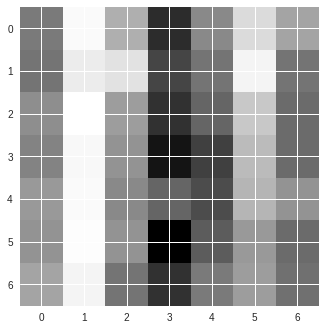

In [56]:
test_data = y_validate.argmax(1)
pred_data = y_pred.argmax(1)
cm = confusion_matrix(test_data,pred_data)
print(cm)

val = 0
for i in range(0,7):
    val += cm[i][i]
print('Validation Set Accuracy = ' + str(val/(index2-index1)))

max_val = cm.max()

plt.imshow(cm)
plt.imshow(cm,cmap='gray')

weight_list = []

for i in range(0,7):
    weight_list.append(0)

for x in pred_data:
    weight_list[x] += 1
    
nm = cm


for i in range(0,7):
    for j in range(0,7):
        nm[i][j] *= max_val
        nm[i][j] /= weight_list[i]
        
plt.imshow(cm,cmap = 'gray')        
plt.imshow(cm,interpolation='nearest') # Visualizing Confusion Matrix


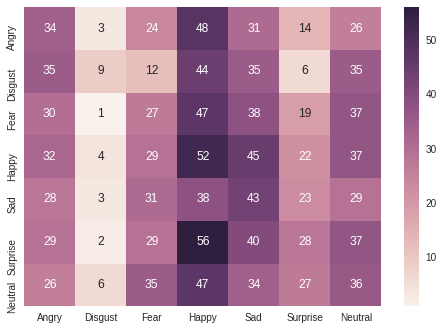

In [58]:
# Heat Map

labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

import seaborn as sn

df_cm = pd.DataFrame(nm,index = [labels[i] for i in range(0,7)],columns = [labels[i] for i in range(0,7)])
sn.set(font_scale = 1)
sn.heatmap(df_cm,annot = True)


# Web Cam


Run time dies automatically on Execution

In [0]:
import cv2


In [0]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)


In [0]:
cv2.waitKey(0)
cv2.destroyAllWindows()

cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()
    cv2.imshow('video out',img)
    k = cv2.waitKey(10)& 0xff

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

# =============================================================================
#     elif k%256 == 32:
#         # SPACE pressed
#         img_name = "opencv_frame_{}.png".format(img_counter)
#         cv2.imwrite(img_name, frame)
#         print("{} written!".format(img_name))
#         img_counter += 1
# 
# =============================================================================
cam.release()

cv2.destroyAllWindows()